# UCSD ECE143 Final Project

## 1. Data Clean Up

In [1]:
import json
from collections import defaultdict

companies = defaultdict(int)
location = defaultdict(int)
skills = defaultdict(int)
industry = defaultdict(int)

with open('143dataall.json','r') as f:
    allpeople = f.readlines()
    
    for person in allpeople:
        info = json.loads(person)
        if info:

            try:
                industry[info['industryName']] += 1
            except:
                # printing failure reason
                print("industry")
#                 print(info)
                print()
                print()
                print()
                print()

            if info['experience']:
                companies[info['experience'][0]['companyName']] += 1

            try:
                # split the location in city and state for furture analysis
                # and save that into tuple
                curPlace = info['geoLocationName']
                city, state = curPlace.split(',')
                found = None #indicator of whether location has found in certain format
                for savedCity, savedState in location:
                    if city in savedCity:
                        found = True
                        location[(savedCity, savedState)] += 1

                if not found:
                    location[(city,state)] += 1
            except:
                # printing failure reason
                print('geoloc')
#                 print(info)
#                 print()
#                 print()
#                 print()
#                 print()

            try:
                if info['skills']:
                    for skill in info['skills']:
                        if skill['name'].lower() == 'c' or skill['name'].lower() == 'c++' or skill['name'].lower() == 'c/c++' :
                            skills['c/c++'] += 1
                        else:
                            skills[skill['name'].lower()] += 1
            except:
                print('skill')
#                 print(info)
#                 print()
#                 print()
#                 print()
#                 print()
print(companies)
print(location)
print(industry)
print(skills)

geoloc
geoloc
industry




geoloc
geoloc
geoloc
geoloc
geoloc
geoloc
geoloc
geoloc
geoloc
geoloc
geoloc
geoloc
geoloc
geoloc
geoloc
industry




geoloc
geoloc
geoloc
geoloc
geoloc
geoloc
geoloc
geoloc
geoloc
geoloc
geoloc
geoloc
geoloc
geoloc
geoloc
geoloc
industry




geoloc
geoloc
geoloc
geoloc
geoloc
geoloc
geoloc
geoloc
geoloc
geoloc
geoloc
geoloc
geoloc
geoloc
geoloc
geoloc
geoloc
defaultdict(<class 'int'>, {'Wish': 1, 'Autodesk': 1, 'Moebius Solutions, Inc.': 3, 'University of California, Los Angeles': 1, 'Amazon': 87, 'Eureka By SAP S/4HANA': 1, 'YouTube': 1, 'Microsoft': 21, 'CliniComp, Intl.': 1, 'ICPC Lab of Zhejiang University City Colleage': 1, 'Zocdoc': 1, 'SAP': 1, 'University of California San Diego': 54, 'UCSD': 4, 'Facebook': 26, 'PlayStation': 1, 'Tencent': 8, 'Expedia Group': 2, 'Alibaba Group': 2, 'Google': 41, 'Yelp': 2, 'iTradeNetwork, Inc.': 1, 'Skyoo LLC': 1, '北京思图场景数据科技服务有限公司': 1, 'Amazon Web Services': 7, 'Hulu': 3, 'Underworld Productions': 1, 'Teradata': 8, 

In [2]:
def checkAlign(major, industry):
    '''
    this function check major and industry align or not
    if can't determine, print out for manual check
    : param major: input major
    : param industry: input working industry
    '''
    if major == 'computer science' or major == 'computational science' or major == '计算机科学':
        if industry == 'computer software' or industry == 'internet' \
        or industry == 'information technology & services':
            return True
        else:
            print("PoTenTial False!! , ", major, ' ', industry)
            return False
    elif major == 'electrical engineering' or major == 'integrated circuit design' or major == 'nanoscale devices and systems':
        if industry == 'semiconductors' or industry == 'consumer electronics' or industry == 'computer hardware'\
        or industry == 'computer networking' or industry == 'electrical & electronic manufacturing' \
        or industry == 'wireless' or industry == 'telecommunications':
            return True
        else:
            print("PoTenTial False!! , ", major, ' ', industry)
            return False
            
    elif major == 'machine learning and data science' or major == 'intelligent systems':
        print("PoTenTial False!! , ", major, ' ', industry)
        if industry == 'computer software' or industry == 'research':
            return True
        else:
            return False
        
    elif major == 'applied mathematics':
        if industry == 'information technology & services':
            return True
        else:
            print("PoTenTial False!! , ", major, ' ', industry)
            return False
            
    elif major == 'finance, general' or major == 'economics' or major == 'business' or major == 'quantitative finance':
        if industry == 'management consulting' or industry == 'financial services' or \
        industry == 'marketing & advertising' or industry == 'investment banking/venture' or\
        industry == 'banking' or industry == 'venture capital':
            return True
        else:
            print("PoTenTial False!! , ", major, ' ', industry)
            return False
            
    elif major == 'biochemistry and biostatistics' or major == 'bioinformatics and systems biology':
        if industry == 'research' or industry == 'biotechnology':
            return True
        else:
            print("PoTenTial False!! , ", major, ' ', industry)
            return False
    else:
        print('minority major ,', major, ' ', industry)
        return False
    

In [3]:
import difflib
with open('143dataall.json','r') as f:
    allpeople = f.readlines()
    field_of_study = defaultdict(int)
    industryName = defaultdict(int)
    
    align = 0
    numpeople = len(allpeople)
    
    for person in allpeople:
        info = json.loads(person)
        if info:
            if 'education' in info and 'industryName' in info and info['education'] and 'fieldOfStudy' in info['education'][0]:
            #make sure all of the keys exist
                thisEdu = None
                thisIndustry = None

                # try to merge some of the majors by ckecking whether it is at least 50%
                # align with the exist major
                
                for key in field_of_study:
                    tmp = info['education'][0]['fieldOfStudy'].lower()
                    s = difflib.SequenceMatcher(None, key, tmp)
                    match = s.find_longest_match(0, len(key), 0, len(tmp))
                    
                    
                    if match.size > 0.45 * min(len(tmp), len(key)):
                        field_of_study[key] += 1
                        thisEdu = key
                        break
                if not thisEdu:
                    field_of_study[info['education'][0]['fieldOfStudy'].lower()] += 1
                    thisEdu = info['education'][0]['fieldOfStudy'].lower()
                    
                industryName[info['industryName'].lower()] += 1
                thisIndustry = info['industryName'].lower()
                
                # check a potential match below
                if checkAlign(thisEdu, thisIndustry):
                    align += 1

    print(field_of_study, len(field_of_study))
    print(industryName, len(industryName))
    print(align, " of total ", numpeople)

minority major , information technology - mobility   computer software
PoTenTial False!! ,  computer science   higher education
PoTenTial False!! ,  computer science   management consulting
PoTenTial False!! ,  applied mathematics   computer software
PoTenTial False!! ,  electrical engineering   computer software
PoTenTial False!! ,  electrical engineering   computer software
PoTenTial False!! ,  intelligent systems   computer software
PoTenTial False!! ,  computer science   financial services
PoTenTial False!! ,  electrical engineering   internet
minority major , biology, bioinformatics, and computational biology   computer software
minority major , analytics   computer software
PoTenTial False!! ,  applied mathematics   computer software
PoTenTial False!! ,  electrical engineering   internet
PoTenTial False!! ,  biochemistry and biostatistics   higher education
PoTenTial False!! ,  computer science   marketing & advertising
PoTenTial False!! ,  intelligent systems   computer software

In [4]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'aligned', 'not aligned'
sizes = [align, numpeople - align]
colors = ['gold', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')

(-1.0810241791882453,
 1.1296278269200328,
 -1.2079877562797694,
 1.1273501072761778)

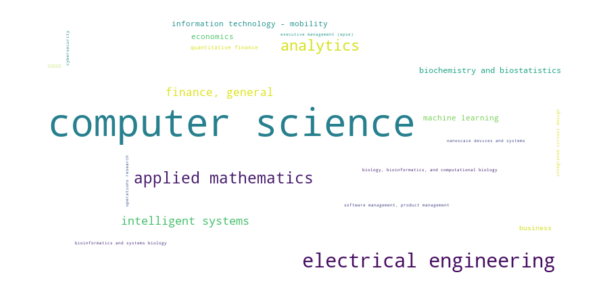

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

%matplotlib inline
#
# this block was used to create word cloud plot
#
#
wc = WordCloud(width = 800, height = 400,background_color ='white').generate_from_frequencies(field_of_study)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wc, interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 

## 2. Data Visualization

### a. Necessary methods and constant

In [45]:
import json
from collections import defaultdict
import plotly
# import plotly.plotly as py
import plotly.offline as of
import plotly.graph_objs as go
import math
import addfips
import xlrd
import difflib

# seperate the dict to be two lists
def seperateData(data):
    dictionary = dict(data)
    keys = dictionary.keys()
    values = dictionary.values()
    return list(keys), list(values)

# seperate the data for company information
def seperateDataCompany(data):
    dictionary = dict(data)
    tmp = dictionary.pop('University of California, San Diego - Jacobs School of Engineering')
    dictionary['University of California San Diego'] += tmp
    tmp = dictionary.pop('Amazon Web Services (AWS)')
    dictionary['Amazon'] += tmp
    
    keys = list(dictionary.keys())
    values = list(dictionary.values())    
    return (keys), (values)

# Set the top most skills we want to display
def getHighest(key, values, num):
    key, values = getSorted(key, values)
    newKey = key[:num]
    newValue = values[:num]
    return newKey, newValue

# Sort the key and values
def getSorted(key, values):
    tmpDict = dict(zip(key, values))
    tmp = sorted(tmpDict.items(),key=lambda item:item[1],reverse=True)
    key = [i[0] for i in tmp]
    value = [i[1] for i in tmp]
    return key, value


# seperate the data for location information
def seperate_Loc_Data(data):
    dictionary = dict(data)
    keys = dictionary.keys()
    tmp = list(keys)
    values = dictionary.values()
    res = []
    for elem in keys:
        state = elem[1].strip()
        if state in us_state_abbrev:
            res.append(us_state_abbrev[state])
    return res, list(values)

def seperate_City_Data(data):
    dictionary = dict(data)
    keys = dictionary.keys()
    tmp = list(keys)
    values = dictionary.values()
    res = []
    for elem in keys:
        state = elem[1].strip()
        city = elem[0].strip()
#         print(city)
        if state in us_state_abbrev:
            res.append(city)
    return res, list(values)


def seperate_City_State_Data(data):
    dictionary = dict(data)
    keys = dictionary.keys()
    tmp = list(keys)
    v = list(dictionary.values())
    values = []
    res = []
    for i in range(len(keys)):
        state = tmp[i][1].strip()
        city = tmp[i][0].strip()
#         print(city)
        if state in us_state_abbrev:
            res.append((state, city))
            values.append(v[i])
    return res, list(values)

# count statistics data for loc and values
def coordinate_Loc_Val(loc, values):
    res = dict()
    for i in range(len(loc)):
        if loc[i] not in res: res[loc[i]] = values[i]
        else: res[loc[i]] += values[i]
    return list(res.keys()), [math.log(i+1) for i in list(res.values())]

# take log to the data and see if it performance better
def log_the_value(label, values):
    return list(label), [(math.log(i+1)) for i in values]


def coordinate_City_Val(loc, city, values):
    res = dict()
    print(loc)
    print(city)
    for i in range(len(loc)):
        if (loc[i],city[i]) not in res: res[(loc[i],city[i])] = values[i]
        else: res[(loc[i],city[i])] += values[i]
    return list(res.keys()), list(res.values())



def getFIPS_General(city_tuple, values): # not used as the addfips lib can not recognize some cities
    res = []
    af = addfips.AddFIPS()
#     print(city_tuple)
#     print(values)
    for i in range(len (values)):
        res.append(af.get_county_fips(city_tuple[i][1], state=city_tuple[i][0]))
    res, values = getSorted(res, values)
    return res


def getFIPS(city_tuple, values):
    print(city_tuple)
    print(values)
    res = []
    v = []
    cityName = []
    for i in range(len(values)):
        if city_tuple[i][1] == 'San Diego County':
            res.append('06073')
            v.append(values[i])
            cityName.append(city_tuple[i][1])
        elif city_tuple[i][1] == 'Sunnyvale':
            res.append('06085')
            v.append(values[i])
            cityName.append(city_tuple[i][1])
        elif city_tuple[i][1] == 'San Francisco':
            res.append('06075')
            v.append(values[i])
            cityName.append(city_tuple[i][1])
        elif city_tuple[i][1] == 'Seattle':
            res.append('63000')
            v.append(values[i])
            cityName.append(city_tuple[i][1])
        elif city_tuple[i][1] == 'Redmond':
            res.append('57535')
            v.append(values[i])
            cityName.append(city_tuple[i][1])
        elif city_tuple[i][1] == 'Palo Alto':
            res.append('06086') # should be the same with sunnyvale
            v.append(values[i])
            cityName.append(city_tuple[i][1])
        elif city_tuple[i][1] == 'DuPage County':
            res.append('17043')
            v.append(values[i])
            cityName.append(city_tuple[i][1])
        elif city_tuple[i][1] == 'Mountain View':
            res.append('06087') # should be the same with sunnyvale
            v.append(values[i])
            cityName.append(city_tuple[i][1])
        elif city_tuple[i][1] == 'Los Angeles':
            res.append('06037')
            v.append(values[i])
            cityName.append(city_tuple[i][1])
        elif city_tuple[i][1] == 'Morgan Hill':
            res.append('06074') # Should be the same with San Fransisco
            v.append(values[i])
            cityName.append(city_tuple[i][1])
        elif city_tuple[i][1] == 'Castro Valley':
            res.append('06075')
            v.append(values[i])
            cityName.append(city_tuple[i][1])
        elif city_tuple[i][1] == 'Irvine':
            res.append('06059') # can't find it
            v.append(values[i])
            cityName.append(city_tuple[i][1])
        elif (city_tuple[i][1] == 'Cupertino' or city_tuple[i][1] == 'San Jose'):
            res.append('06081')
            v.append(values[i])
            cityName.append(city_tuple[i][1])
        elif city_tuple[i][1] == 'El Cajon':
            res.append('06071')
            v.append(values[i])
            cityName.append(city_tuple[i][1])
        elif city_tuple[i][1] == 'Trabuco Canyon':
            res.append('06065')
            v.append(values[i])
            cityName.append(city_tuple[i][1])
        elif city_tuple[i][1] == 'Santa Clara':
            res.append('06085')
            v.append(values[i])
            cityName.append(city_tuple[i][1])
        elif city_tuple[i][1] == 'Orange County':
            res.append('06059')
            v.append(values[i])
            cityName.append(city_tuple[i][1])
        elif city_tuple[i][1] == 'Corona':
            res.append('06011')
            v.append(values[i])
            cityName.append(city_tuple[i][1])
        elif city_tuple[i][1] == 'Trabuco Canyon':
            res.append('06065')
            v.append(values[i])
            cityName.append(city_tuple[i][1])
        elif city_tuple[i][1] == 'Trabuco Canyon':
            res.append('06065')
            v.append(values[i])
            cityName.append(city_tuple[i][1])
    return res, v, cityName

us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Palau': 'PW',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}


def checkAlign(major, industry):
    '''
    this function check major and industry align or not
    if can't determine, print out for manual check
    : param major: input major
    : param industry: input working industry
    '''
    if major == 'computer science' or major == 'computational science' or major == '计算机科学':
        if industry == 'computer software' or industry == 'internet' \
        or industry == 'information technology & services':
            return True
        else:
            print("PoTenTial False!! , ", major, ' ', industry)
            return False
    elif major == 'electrical engineering' or major == 'integrated circuit design' or major == 'nanoscale devices and systems':
        if industry == 'semiconductors' or industry == 'consumer electronics' or industry == 'computer hardware'\
        or industry == 'computer networking' or industry == 'electrical & electronic manufacturing' \
        or industry == 'wireless' or industry == 'telecommunications':
            return True
        else:
            print("PoTenTial False!! , ", major, ' ', industry)
            return False
            
    elif major == 'machine learning and data science' or major == 'intelligent systems':
        print("PoTenTial False!! , ", major, ' ', industry)
        if industry == 'computer software' or industry == 'research':
            return True
        else:
            return False
        
    elif major == 'applied mathematics':
        if industry == 'information technology & services':
            return True
        else:
            print("PoTenTial False!! , ", major, ' ', industry)
            return False
            
    elif major == 'finance, general' or major == 'economics' or major == 'business' or major == 'quantitative finance':
        if industry == 'management consulting' or industry == 'financial services' or \
        industry == 'marketing & advertising' or industry == 'investment banking/venture' or\
        industry == 'banking' or industry == 'venture capital':
            return True
        else:
            print("PoTenTial False!! , ", major, ' ', industry)
            return False
            
    elif major == 'biochemistry and biostatistics' or major == 'bioinformatics and systems biology':
        if industry == 'research' or industry == 'biotechnology':
            return True
        else:
            print("PoTenTial False!! , ", major, ' ', industry)
            return False
    else:
        print('minority major ,', major, ' ', industry)
        return False

    
    
with open('143dataall.json','r') as f:
    allpeople = f.readlines()
    field_of_study = defaultdict(int)
    industryName = defaultdict(int)
    
    align = 0
    numpeople = len(allpeople)
    
    for person in allpeople:
        info = json.loads(person)
        if info:
            if 'education' in info and 'industryName' in info and info['education'] and 'fieldOfStudy' in info['education'][0]:
            #make sure all of the keys exist
                thisEdu = None
                thisIndustry = None

                # try to merge some of the majors by ckecking whether it is at least 50%
                # align with the exist major
                
                for key in field_of_study:
                    tmp = info['education'][0]['fieldOfStudy'].lower()
                    s = difflib.SequenceMatcher(None, key, tmp)
                    match = s.find_longest_match(0, len(key), 0, len(tmp))
                    
                    
                    if match.size > 0.5 * min(len(tmp), len(key)):
                        field_of_study[key] += 1
                        thisEdu = key
                        break
                if not thisEdu:
                    field_of_study[info['education'][0]['fieldOfStudy'].lower()] += 1
                    thisEdu = info['education'][0]['fieldOfStudy'].lower()
                    
                industryName[info['industryName'].lower()] += 1
                thisIndustry = info['industryName'].lower()
                
                # check a potential match below
                if checkAlign(thisEdu, thisIndustry):
                    align += 1
                    
    print(field_of_study, len(field_of_study))
    print(industryName, len(industryName))
    print(align, " of total ", numpeople)

minority major , minor: design, and program of concentration: perspective of social sciences   computer software
minority major , information technology - mobility   computer software
PoTenTial False!! ,  machine learning and data science   computer software
PoTenTial False!! ,  computer science   higher education
minority major , management science   management consulting
PoTenTial False!! ,  applied mathematics   computer software
PoTenTial False!! ,  machine learning and data science   information technology & services
PoTenTial False!! ,  machine learning and data science   computer software
PoTenTial False!! ,  electrical engineering   computer software
PoTenTial False!! ,  electrical engineering   computer software
PoTenTial False!! ,  machine learning and data science   computer software
PoTenTial False!! ,  intelligent systems   computer software
minority major , management science   financial services
PoTenTial False!! ,  electrical engineering   internet
minority major , anal

### a. Employees Skills --- Pie Plot

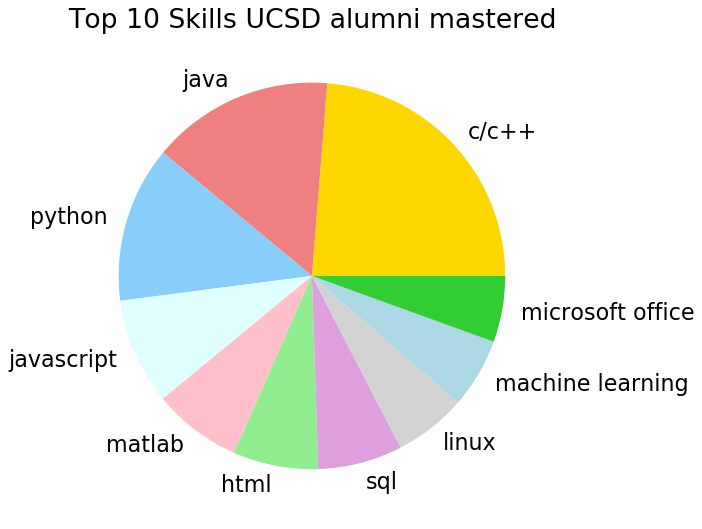

In [7]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
if __name__ == '__main__':
    
#         #===============Then Set up the figures in plotly============#
#     of.offline.init_notebook_mode(connected=True)
#     trace = [go.Pie(
#         labels = skill, 
#         values = number, 
#         hole =  0,                          # Modify the radius of the hole, higher means larger hole
#         text = skill,
#         textposition = 'auto',
#         hoverinfo = "label + percent")
#             ]
#     layout = go.Layout(title ="Top 15 Skills UCSD alumni mastered", titlefont=dict(color='rgb(200, 100, 100)',size=30))
#     data = [trace]
#     fig = go.Figure(data = trace, layout = layout)
#     of.iplot(fig)
    #=============== Set up the data ===================#
    skill, number = seperateData(skills)
    number = [number[i]/sum(number) for i in range(len(number))] #convert number to percentage
    skill, number = getHighest(skill, number, 10)  # Only display the top NO.15 skills
    total = sum(number)
    number = [i/total for i in number]
    figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
    colors=['gold', 'lightcoral','lightskyblue','lightcyan',  
            'pink', 'lightgreen', 'plum', 'lightgrey', 'lightblue',
           'limegreen','coral','c','dodgerblue','tomato','lightsalmon']
    plt.rcParams.update({'font.size': 20})
    plt.pie(number, labels=skill, colors=colors, shadow=False)
    plt.title("Top 10 Skills UCSD alumni mastered")
    plt.savefig('Top 15 Skills')
    

### b. People in different companies  -- Bar Chart

In [8]:
if __name__ == '__main__':
    #=============== Set up the data ===================#
#     print(companies)
    company, number = seperateDataCompany(companies)
#     print(company, number)
    company, number = getHighest(company, number, 12)  # Only display the top NO.15 companies
#     print(company, number)
    company, number = getSorted(company, number)
#     print(company, number)
    #============== Set up the Figures =================#
    of.offline.init_notebook_mode(connected=True)
    trace = [go.Bar(
        x = company,
        y = number,
        orientation='v',
        text = number,
#         textposition = 'auto',
        marker_color='rgb(255, 125, 102)'
    )]
    layout = go.Layout(plot_bgcolor='#fff', title =" Top 10 Companies UCSD alumni went to", titlefont=dict(color='rgb(200, 100, 100)',size=30))
    data = [trace]
    fig = go.Figure(data = trace, layout = layout)
    fig.update_layout(    font=dict(
        size=12,
        color="#7f7f7f"
    ))
    of.iplot(fig)
    

### c. Industry that UCSD Alumni went to -- radar chart
#### reference links: https://plot.ly/python/radar-chart/

In [42]:
if __name__ == '__main__':
    #=============== Set up the data ===================#
    industries, number = seperateData(industry)
#     print(industries)
    industries, number = getHighest(industries, number, 5)  # Only display the top NO.15 industries
    
    
    industries = ['computer software + internet', \
                 'semiconductors + electonic + networking',\
                 'information technology & services',\
                 'research',\
                 'consulting + marketing + banking'\
                 ]
    number = [industryName['computer software'] + industryName['internet'],\
             industryName['semiconductors'] + industryName['consumer electronics'] + industryName['computer hardware'] +\
            industryName['computer networking'] + industryName['electrical & electronic manufacturing'] + \
            industryName['wireless'] + industryName['telecommunications'],\
              industryName['information technology & services'],\
             industryName['research'],\
             industryName['management consulting'] + industryName['financial services'] + \
        industryName['marketing & advertising'] + industryName['investment banking/venture'] + \
        industryName['banking'] + industryName['venture capital']]
    industries, number = log_the_value(industries, number)
    print(industries, number)
    #============== Set up the Figures =================#
    fig = go.Figure()
    fig.add_trace(go.Scatterpolar(
      r=number,
      theta=industries,
      fill='toself',
      name='Industry that UCSD Alumni went to',
      opacity  = 0.5, # Set up the opacity of the figure
      marker_color='rgb(177, 66, 255)' #Adjust the color of the covered area
    ))

    fig.update_layout(
    plot_bgcolor='#fff',
    polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 8]
    )),
    font=dict(
#         family="Courier New, monospace",
        size=20
#         color="#7f7f7f"
    ),
    title =" Top 5 Industry UCSD alumni went to", 
    titlefont = dict(color='rgb(200, 100, 100)',size=30),
    showlegend=False
)
    
    fig.show()

['computer software + internet', 'semiconductors + electonic + networking', 'information technology & services', 'research', 'consulting + marketing + banking'] [6.542471960506805, 3.258096538021482, 3.367295829986474, 2.5649493574615367, 3.1780538303479458]


In [29]:
"""
This is the plot for the majors
"""
if __name__ == '__main__':
    #=============== Set up the data ===================#
    industries, number = seperateData(field_of_study)
#     print(industries)
    industries, number = getHighest(industries, number, 5)  # Only display the top NO.15 industries
    industries, number = log_the_value(industries, number)
    #============== Set up the Figures =================#
    fig = go.Figure()
    fig.add_trace(go.Scatterpolar(
      r=number,
      theta=industries,
      fill='toself',
      name='Major that UCSD Alumni studied in',
      opacity  = 0.5, # Set up the opacity of the figure
      marker_color='rgb(177, 66, 255)' #Adjust the color of the covered area
    ))

    fig.update_layout(
    plot_bgcolor='#fff',
    polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 8]
    )),
    font=dict(
#         family="Courier New, monospace",
        size=13.2
#         color="#7f7f7f"
    ),
    title =" Top 5 Major UCSD alumni studied", 
    titlefont = dict(color='rgb(200, 100, 100)',size=30),
    showlegend=False
)
    
    fig.show()

### d. Location that UCSD Alumni went to

In [46]:
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly
import geopandas

loc, value = seperate_Loc_Data(location)
loc, value = coordinate_Loc_Val(loc, value)
city, value = seperate_City_State_Data(location)
fips, value, cityName = getFIPS(city, value)

scope = ['California']
values = range(len(fips))
_, value = log_the_value(cityName, value)

colorscale = [
    'rgb(255, 0, 0)',
    'rgb(255, 30, 0)',
    'rgb(255, 60, 0)',
    'rgb(255, 90, 0)',
    'rgb(255, 120, 0)',
    'rgb(255, 180, 0)',
    'rgb(255, 210, 0)',
    'rgb(255, 240, 0)',
    'rgb(255, 255, 160)'
]

colorscale.reverse()

fig = ff.create_choropleth(fips=fips, values=value, colorscale = colorscale, scope=['CA'],county_outline={'color': 'rgb(155,155,155)','width': 1}, state_outline={'color': 'rgb(0, 0, 0)','width': 1},
                           round_legend_values=True)
fig.layout.template = None
# for i in range(len(fig.data)):
#     fig.data[i].update(text = city[i], mode = 'text')

fig.update_layout(title =" Top 5 Industry UCSD alumni went to", 
    titlefont=dict(color='rgb(200, 100, 100)',size=30),
    geo = dict(showframe=False,
        showcoastlines=True,
        showland=False,
        landcolor="lightgray"))
fig.show()


[('California', 'San Diego County'), ('California', 'Sunnyvale'), ('California', 'San Francisco'), ('Washington', 'Seattle'), ('Washington', 'Redmond'), ('California', 'Palo Alto'), ('Illinois', 'DuPage County'), ('California', 'Mountain View'), ('California', 'San Jose'), ('California', 'Chula Vista'), ('Pennsylvania', 'Pittsburgh'), ('California', 'Los Angeles'), ('California', 'Morgan Hill'), ('Washington', 'Bellevue'), ('California', 'Castro Valley'), ('Texas', 'Richardson'), ('California', 'Irvine'), ('California', 'Cupertino'), ('California', 'El Cajon'), ('California', 'Trabuco Canyon'), ('New York', 'New York'), ('California', 'Santa Clara'), ('California', 'Orange County'), ('California', 'Corona'), ('California', 'Carlsbad'), ('California', 'Stanford'), ('California', 'Milpitas'), ('New Jersey', 'Princeton'), ('California', 'Walnut'), ('California', 'Encinitas'), ('Minnesota', 'Minneapolis'), ('California', 'Fremont'), ('California', 'La Puente')]
[725, 5, 5, 17, 1, 4, 1, 6, 

In [12]:
import plotly.graph_objects as go
import pandas as pd

# df = pd.read_csv('2011_us_ag_exports.csv')
loc, value = seperate_Loc_Data(location)
loc, value = coordinate_Loc_Val(loc, value)
line = plotly.graph_objects.choropleth.marker.Line()

fig = go.Figure(data=go.Choropleth(
    locations=loc, # Spatial coordinates
    z = value, # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    marker_line_color = 'black', # display the color of the state boundary
    colorscale = 'Reds',
    colorbar_title = "Number of Alumni",
))
fig.update_layout(
    title_text = 'UCSD Alumni Employment Localization Distribution',
    geo_scope='usa', # limite map scope to USA
)
fig.show()


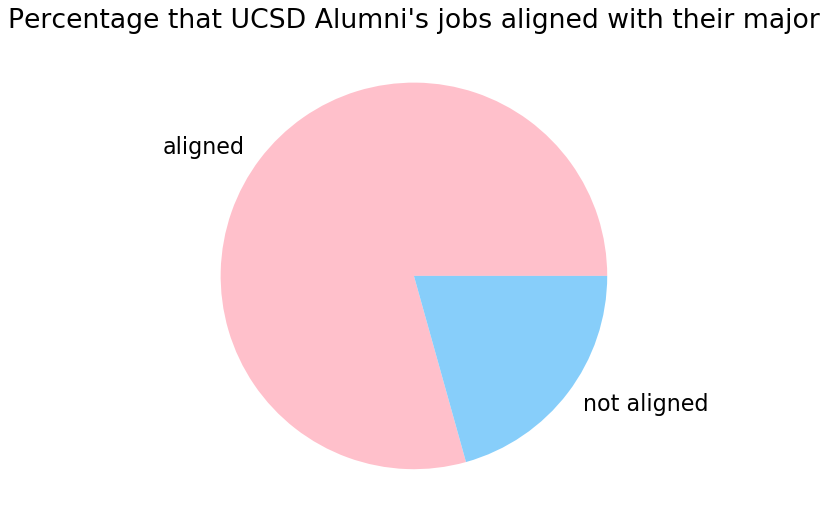

In [13]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'aligned', 'not aligned'
sizes = [align, numpeople - align]
colors = ['gold', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

# plt.axis('equal')
label = ['aligned', 'not aligned']
total = sum(sizes)
number = [i/total for i in sizes]
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
colors=['pink','lightskyblue','lightcyan',  
        'lightcoral', 'lightgreen', 'plum', 'lightgrey', 'lightblue',
       'limegreen','coral','c','dodgerblue','tomato','lightsalmon']
plt.rcParams.update({'font.size': 20})
plt.pie(number, labels=label, colors=colors, shadow=False)
plt.title("Percentage that UCSD Alumni's jobs aligned with their major")
plt.savefig('Percentage that UCSD Alumnis jobs aligned with their major')
# of.offline.init_notebook_mode(connected=True)
# trace = [go.Pie(
#         labels = label, 
#         values = sizes, 
#         hole =  0,                          # Modify the radius of the hole, higher means larger hole
#         hoverinfo = "label + percent")]
# layout = go.Layout(title ="Percentage that UCSD Alumni's jobs aligned with their major", titlefont=dict(color='rgb(255, 128, 0)',size=30))
# data = [trace]
# fig = go.Figure(data = trace, layout = layout)
# of.iplot(fig)


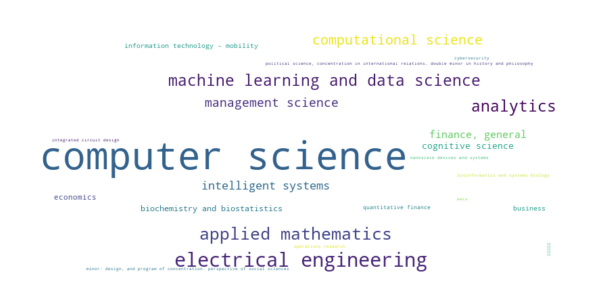

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

%matplotlib inline
#
# this block was used to create word cloud plot
#
#
wc = WordCloud(width = 800, height = 400,background_color ='white').generate_from_frequencies(field_of_study)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc, interpolation='bilinear') 
plt.axis("off")
plt.tight_layout(pad = 0)

### Draw the Line Chart for UCSD incoming student location

In [15]:
incoming = dict()
# Date gathered from UCSD Website
incoming['San Diego'] = [0.14, 0.11, 0.13, 0.13, 0.12, 0.14]
incoming['Los Angeles'] = [0.41, 0.37, 0.38, 0.37, 0.32, 0.36]
incoming['San Francisco'] = [0.18, 0.19, 0.16, 0.16, 0.16,0.14]
incoming['Other CA'] = [0.1, 0.09, 0.1, 0.09, 0.08, 0.08]
incoming['Out-of-state'] = [0.07, 0.1, 0.07, 0.06, 0.08,0.07]
incoming['International'] = [0.11, 0.15, 0.16, 0.21, 0.24, 0.22]

random_x = [2011, 2012, 2013, 2014, 2015, 2016]
random_y0 = (incoming['San Diego'])
# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=random_x, y=incoming['Los Angeles'],
                    mode='lines+markers',
                    name='Los Angeles',
                    line=dict(color='red', width=2)))
fig.add_trace(go.Scatter(x=random_x, y=incoming['San Diego'],
                    mode='lines+markers',
                    name='San Diego',
                    line=dict(color='orange', width=2)))
fig.add_trace(go.Scatter(x=random_x, y=incoming['San Francisco'],
                    mode='lines+markers',
                    name='San Francisco'))
# fig.add_trace(go.Scatter(x=random_x, y=incoming['Other CA'],
#                     mode='lines+markers',
#                     name='Other CA'))
# fig.add_trace(go.Scatter(x=random_x, y=incoming['Out-of-state'],
#                     mode='lines+markers',
#                     name='Out-of-state'))
fig.add_trace(go.Scatter(x=random_x, y=incoming['International'],
                    mode='lines+markers',
                    name='International',
                    line=dict(color='royalblue', width=6, dash='dot')))
# fig.add_trace(go.Scatter(x=random_x, y=random_y2,
#                     mode='markers', name='markers'))

# Edit the layout
fig.update_layout(title='Regional Distribution for incoming UCSD Student',titlefont=dict(color='rgb(255, 100, 0)',size=30),
                   xaxis_title='Year',
                   yaxis_title='Percentage')
fig.show()
